In [1]:

from sklearn.model_selection import train_test_split # split data for trin&tes
from sklearn.ensemble import RandomForestClassifier #model we need to traning  Desition Tree algorthim 
from sklearn.metrics import accuracy_score , confusion_matrix #accuracy for model / we need 100 or 0.99 - 1.
import matplotlib.pyplot as plt # Virtulaization 
import pandas as pd # fro handle dataset 
import numpy as np # arrys 
import seaborn as sns # for draw
import sklearn  # machine learning library
from collections import Counter #count classes 



In [2]:
NAD = pd.read_csv('C:\\Users\\moode\\Desktop\\MyProject\\oversampled_data.csv') #after Somte Analyis 
NAD.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49684,6,281,2,1,38,0.0,38,0,19.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,443,6,132,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
NAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516668 entries, 0 to 1516667
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1516668 non-null  int64  
 1   Protocol           1516668 non-null  int64  
 2   Flow Duration      1516668 non-null  int64  
 3   Tot Fwd Pkts       1516668 non-null  int64  
 4   Tot Bwd Pkts       1516668 non-null  int64  
 5   TotLen Fwd Pkts    1516668 non-null  int64  
 6   TotLen Bwd Pkts    1516668 non-null  float64
 7   Fwd Pkt Len Max    1516668 non-null  int64  
 8   Fwd Pkt Len Min    1516668 non-null  int64  
 9   Fwd Pkt Len Mean   1516668 non-null  float64
 10  Fwd Pkt Len Std    1516668 non-null  float64
 11  Bwd Pkt Len Max    1516668 non-null  int64  
 12  Bwd Pkt Len Min    1516668 non-null  int64  
 13  Bwd Pkt Len Mean   1516668 non-null  float64
 14  Bwd Pkt Len Std    1516668 non-null  float64
 15  Flow Byts/s        1516668 non-n

In [4]:
NAD.shape

(1516668, 79)

In [5]:
NAD.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [6]:
NAD.nunique()

Dst Port          37274
Protocol              4
Flow Duration    445668
Tot Fwd Pkts        754
Tot Bwd Pkts       1064
                  ...  
Idle Mean         32732
Idle Std          58301
Idle Max          11536
Idle Min          37119
Label                 2
Length: 79, dtype: int64

In [7]:
NAD.describe().T

,count,mean,std,min,25%,50%,75%,max
Dst Port,1516668.0,8.408749e+03,1.276123e+04,0.0,443.0,8080.0,8080.00,65534.0
Protocol,1516668.0,7.415528e+00,3.807291e+00,0.0,6.0,6.0,6.00,17.0
Flow Duration,1516668.0,7.983926e+06,2.563389e+07,1.0,509.0,10318.0,257907.25,119999997.0
Tot Fwd Pkts,1516668.0,4.863674e+00,7.405047e+01,1.0,2.0,3.0,3.00,43159.0
Tot Bwd Pkts,1516668.0,5.456902e+00,1.770918e+02,0.0,0.0,1.0,4.00,69241.0
...,...,...,...,...,...,...,...,...
Idle Mean,1516668.0,3.313515e+06,1.465316e+07,0.0,0.0,0.0,0.00,120000000.0
Idle Std,1516668.0,7.396092e+04,1.222612e+06,0.0,0.0,0.0,0.00,75900000.0
Idle Max,1516668.0,3.370889e+06,1.478743e+07,0.0,0.0,0.0,0.00,120000000.0
Idle Min,1516668.0,3.241207e+06,1.457948e+07,0.0,0.0,0.0,0.00,120000000.0


In [8]:
print(NAD.shape)
# Drop Conestent and Qusi-conest initail feature selection  
NAD  =NAD.drop(['Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags',
'FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt',
                'URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Fwd Byts/b Avg','Fwd Pkts/b Avg',
                'Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg'], axis=1)
#print(NAD.columns) # list features 
#print(NAD.dtypes)  # type of feature int , float ,object
print(NAD.shape)  # ( row  x columns  )
#print(NAD.head(5)) # fist n  row 

(1516668, 79)
(1516668, 61)


(1516668, 60)
0.0    758334
1.0    758334
Name: Label, dtype: int64
AxesSubplot(0.22375,0.11;0.5775x0.77)


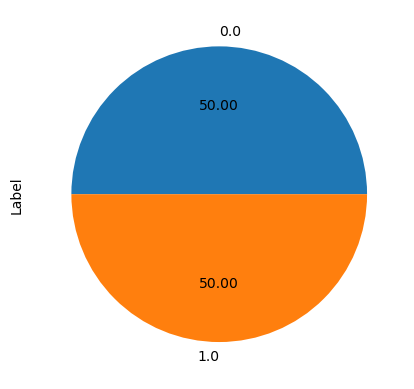

In [9]:

X = NAD.iloc[:,:-1] # all features without (label) feature
Y=  NAD.iloc[:, -1] # only label feature 
print(X.shape)
print(Y.value_counts())
# graoh for label count values 
p=Y.value_counts().plot.pie(autopct='%.2f')
print(p)

In [10]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

# Transform the data
X = scaler.transform(X)


In [11]:


# Start Feature Selection 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import  chi2
sele = SelectKBest(chi2, k=20)
X = sele.fit_transform(X,Y)


filter = sele.get_support(indices=True)
new_features = NAD.columns[filter]
print(new_features)

Index(['Flow Duration', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Fwd PSH Flags', 'Pkt Len Max', 'Pkt Len Var',
       'Bwd Seg Size Avg', 'Init Bwd Win Byts', 'Idle Mean', 'Idle Max',
       'Idle Min'],
      dtype='object')


In [12]:
# Splitting the dataset into train and test sets: 75-25 split
seed = 101
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1137501, 20), (1137501,), (379167, 20), (379167,))

In [13]:
# Creating holders to store the model performance results
ML_Model  = []
accuracy  = []
f1_score  = []
recall    = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

# Logistic Regression Model Trainning 

In [14]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression(max_iter=1000)

# fit the model 
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [15]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [16]:
#computing the accuracy, f1_score, Recall, precision of the model performance
from sklearn import metrics
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)

print("Logistic Regression : Accuracy on training Data: {}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.9151701844657719
Logistic Regression : Accuracy on test Data: 0.9144018334928936

Logistic Regression : f1_score on training Data: 0.9215965081057188
Logistic Regression : f1_score on test Data: 0.9207462394999023

Logistic Regression : Recall on training Data: 0.9964963144531421
Logistic Regression : Recall on test Data: 0.9963692863824457

Logistic Regression : precision on training Data: 0.8571689834512508
Logistic Regression : precision on test Data: 0.85579275627437


confusion matrix 
 [[158179  31769]
 [   687 188532]]


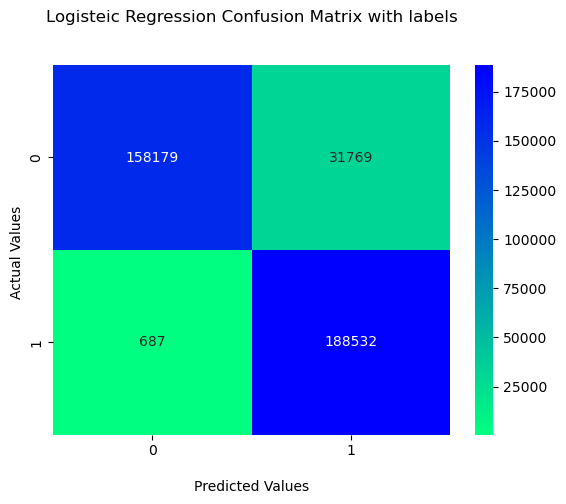

In [17]:
from sklearn import metrics # for model evlation 
conf = confusion_matrix(y_test , y_test_log)
print('confusion matrix \n',  conf)

import seaborn as sns # for virtlation 

ax = sns.heatmap(conf, fmt='d' ,annot=True, cmap='winter_r')

ax.set_title('Logisteic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    189948
         1.0       0.86      1.00      0.92    189219

    accuracy                           0.91    379167
   macro avg       0.93      0.91      0.91    379167
weighted avg       0.93      0.91      0.91    379167



In [19]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

# Training navie bais model

In [20]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB


# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [21]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [22]:
acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.7863272208112344
Naive Bayes Classifier : Accuracy on test Data: 0.7858041443480049

Naive Bayes Classifier : f1_score on training Data: 0.8218845198636066
Naive Bayes Classifier : f1_score on test Data: 0.8212164571730469

Naive Bayes Classifier : Recall on training Data: 0.9853263400191525
Naive Bayes Classifier : Recall on test Data: 0.9857730988959883

Naive Bayes Classifier : precision on training Data: 0.7049503058584528
Naive Bayes Classifier : precision on test Data: 0.7037400349366726


confusion matrix 
 [[111424  78524]
 [  2692 186527]]


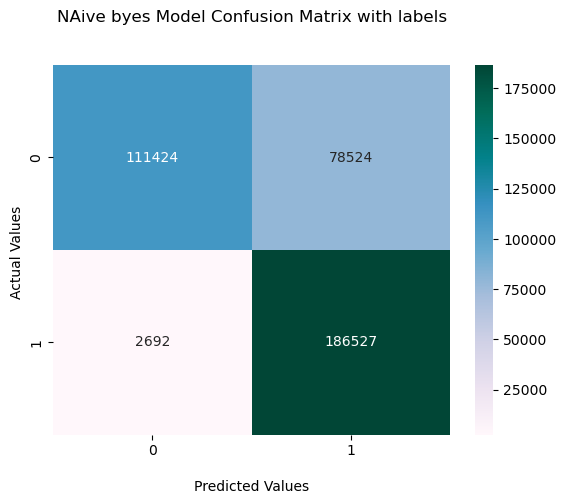

In [23]:
conf = confusion_matrix(y_test , y_test_nb)
print('confusion matrix \n',  conf)
ax = sns.heatmap(conf,fmt='d' ,annot=True, cmap='PuBuGn')

ax.set_title('NAive byes Model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['Posiative','Nigative'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

         0.0       0.98      0.59      0.73    189948
         1.0       0.70      0.99      0.82    189219

    accuracy                           0.79    379167
   macro avg       0.84      0.79      0.78    379167
weighted avg       0.84      0.79      0.78    379167



In [25]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

# Decsision Tree classifer

In [26]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=15,criterion='entropy')

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [27]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [28]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.9539798206770808
Decision Tree : Accuracy on test Data: 0.953469051895339

Decision Tree : f1_score on training Data: 0.9560258260488262
Decision Tree : f1_score on test Data: 0.9554459571050857

Decision Tree : Recall on training Data: 0.999866459327201
Decision Tree : Recall on test Data: 0.9997621803307278

Decision Tree : precision on training Data: 0.915868220585182
Decision Tree : precision on test Data: 0.9148917648424352


confusion matrix 
 [[172350  17598]
 [    45 189174]]


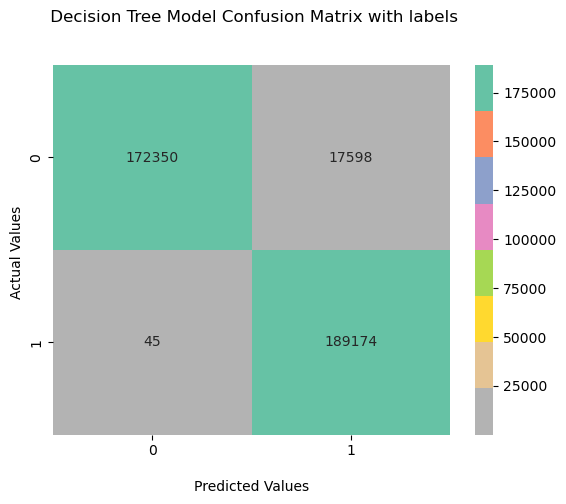

In [29]:


conf = confusion_matrix(y_test , y_test_tree)
print('confusion matrix \n',  conf)
ax = sns.heatmap(conf, annot=True,fmt='d', cmap='Set2_r')

ax.set_title(' Decision Tree Model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Posative','Nigative'])
#ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()



In [30]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95    189948
         1.0       0.91      1.00      0.96    189219

    accuracy                           0.95    379167
   macro avg       0.96      0.95      0.95    379167
weighted avg       0.96      0.95      0.95    379167



In [31]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

# Random forest Classifer 

In [32]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=15,criterion='entropy')

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [33]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.9542154248655605
Random Forest : Accuracy on test Data: 0.9536905901621185

Random Forest : f1_score on training Data: 0.9562413982587303
Random Forest : f1_score on test Data: 0.9556488991157057

Random Forest : Recall on training Data: 0.9998734877836641
Random Forest : Recall on test Data: 0.9997674652122672

Random Forest : precision on training Data: 0.9162580850847998
Random Forest : precision on test Data: 0.9148917648424352


confusion matrix 
 [[172433  17515]
 [    44 189175]]


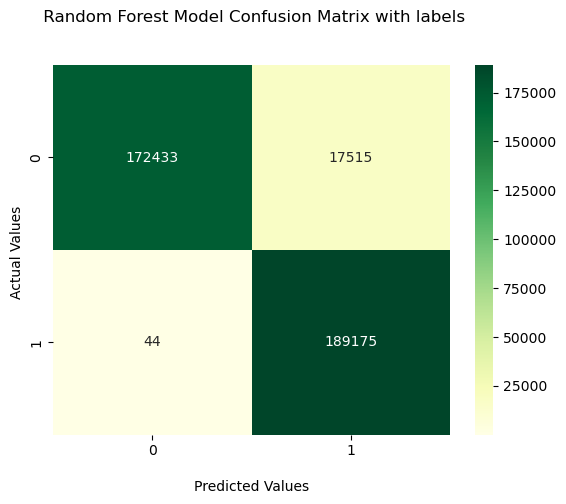

In [35]:


conf = confusion_matrix(y_test , y_test_forest)
print('confusion matrix \n',  conf)
ax = sns.heatmap(conf, annot=True,fmt='d', cmap='YlGn')

ax.set_title(' Random Forest Model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Posative','Nigative'])
#ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()



In [36]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95    189948
         1.0       0.92      1.00      0.96    189219

    accuracy                           0.95    379167
   macro avg       0.96      0.95      0.95    379167
weighted avg       0.96      0.95      0.95    379167



In [37]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

# CatBoost Classifier

In [38]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.3921040	total: 575ms	remaining: 9m 34s
1:	learn: 0.2329561	total: 906ms	remaining: 7m 32s
2:	learn: 0.1381032	total: 1.18s	remaining: 6m 33s
3:	learn: 0.0936327	total: 1.48s	remaining: 6m 7s
4:	learn: 0.0633359	total: 1.77s	remaining: 5m 51s
5:	learn: 0.0440264	total: 2.05s	remaining: 5m 39s
6:	learn: 0.0343076	total: 2.33s	remaining: 5m 29s
7:	learn: 0.0269389	total: 2.62s	remaining: 5m 24s
8:	learn: 0.0221002	total: 2.88s	remaining: 5m 17s
9:	learn: 0.0183721	total: 3.17s	remaining: 5m 14s
10:	learn: 0.0155753	total: 3.43s	remaining: 5m 8s
11:	learn: 0.0136300	total: 3.71s	remaining: 5m 5s
12:	learn: 0.0121239	total: 3.99s	remaining: 5m 2s
13:	learn: 0.0109672	total: 4.26s	remaining: 4m 59s
14:	learn: 0.0102499	total: 4.54s	remaining: 4m 58s
15:	learn: 0.0094951	total: 4.82s	remaining: 4m 56s
16:	learn: 0.0089919	total: 5.06s	remaining: 4m 52s
17:	learn: 0.0085458	total: 5.33s	remaining: 4m 50s
18:	learn: 0.0082712	total: 5.62s	remaining: 4m 50s
19:	learn: 0.0079976	total

160:	learn: 0.0049843	total: 40.1s	remaining: 3m 28s
161:	learn: 0.0049843	total: 40.3s	remaining: 3m 28s
162:	learn: 0.0049843	total: 40.5s	remaining: 3m 27s
163:	learn: 0.0049843	total: 40.7s	remaining: 3m 27s
164:	learn: 0.0049843	total: 40.9s	remaining: 3m 26s
165:	learn: 0.0049843	total: 41s	remaining: 3m 26s
166:	learn: 0.0049843	total: 41.3s	remaining: 3m 25s
167:	learn: 0.0049842	total: 41.5s	remaining: 3m 25s
168:	learn: 0.0049842	total: 41.7s	remaining: 3m 25s
169:	learn: 0.0049843	total: 41.9s	remaining: 3m 24s
170:	learn: 0.0049843	total: 42.1s	remaining: 3m 24s
171:	learn: 0.0049843	total: 42.3s	remaining: 3m 23s
172:	learn: 0.0049843	total: 42.5s	remaining: 3m 23s
173:	learn: 0.0049843	total: 42.7s	remaining: 3m 22s
174:	learn: 0.0049842	total: 42.9s	remaining: 3m 22s
175:	learn: 0.0049842	total: 43.1s	remaining: 3m 21s
176:	learn: 0.0049842	total: 43.3s	remaining: 3m 21s
177:	learn: 0.0049842	total: 43.5s	remaining: 3m 20s
178:	learn: 0.0049842	total: 43.7s	remaining: 3m

316:	learn: 0.0049789	total: 1m 10s	remaining: 2m 30s
317:	learn: 0.0049790	total: 1m 10s	remaining: 2m 30s
318:	learn: 0.0049790	total: 1m 10s	remaining: 2m 30s
319:	learn: 0.0049790	total: 1m 10s	remaining: 2m 29s
320:	learn: 0.0049789	total: 1m 10s	remaining: 2m 29s
321:	learn: 0.0049789	total: 1m 10s	remaining: 2m 29s
322:	learn: 0.0049790	total: 1m 11s	remaining: 2m 29s
323:	learn: 0.0049790	total: 1m 11s	remaining: 2m 28s
324:	learn: 0.0049789	total: 1m 11s	remaining: 2m 28s
325:	learn: 0.0049789	total: 1m 11s	remaining: 2m 28s
326:	learn: 0.0049789	total: 1m 11s	remaining: 2m 27s
327:	learn: 0.0049789	total: 1m 11s	remaining: 2m 27s
328:	learn: 0.0049789	total: 1m 12s	remaining: 2m 27s
329:	learn: 0.0049789	total: 1m 12s	remaining: 2m 26s
330:	learn: 0.0049789	total: 1m 12s	remaining: 2m 26s
331:	learn: 0.0049789	total: 1m 12s	remaining: 2m 26s
332:	learn: 0.0049789	total: 1m 12s	remaining: 2m 25s
333:	learn: 0.0049789	total: 1m 12s	remaining: 2m 25s
334:	learn: 0.0049789	total:

469:	learn: 0.0049786	total: 1m 37s	remaining: 1m 49s
470:	learn: 0.0049786	total: 1m 37s	remaining: 1m 49s
471:	learn: 0.0049786	total: 1m 37s	remaining: 1m 49s
472:	learn: 0.0049786	total: 1m 38s	remaining: 1m 49s
473:	learn: 0.0049786	total: 1m 38s	remaining: 1m 48s
474:	learn: 0.0049786	total: 1m 38s	remaining: 1m 48s
475:	learn: 0.0049786	total: 1m 38s	remaining: 1m 48s
476:	learn: 0.0049786	total: 1m 38s	remaining: 1m 48s
477:	learn: 0.0049786	total: 1m 39s	remaining: 1m 48s
478:	learn: 0.0049786	total: 1m 39s	remaining: 1m 47s
479:	learn: 0.0049786	total: 1m 39s	remaining: 1m 47s
480:	learn: 0.0049786	total: 1m 39s	remaining: 1m 47s
481:	learn: 0.0049786	total: 1m 39s	remaining: 1m 47s
482:	learn: 0.0049786	total: 1m 39s	remaining: 1m 46s
483:	learn: 0.0049786	total: 1m 40s	remaining: 1m 46s
484:	learn: 0.0049786	total: 1m 40s	remaining: 1m 46s
485:	learn: 0.0049786	total: 1m 40s	remaining: 1m 46s
486:	learn: 0.0049786	total: 1m 40s	remaining: 1m 45s
487:	learn: 0.0049785	total:

623:	learn: 0.0049785	total: 2m 7s	remaining: 1m 17s
624:	learn: 0.0049785	total: 2m 7s	remaining: 1m 16s
625:	learn: 0.0049785	total: 2m 8s	remaining: 1m 16s
626:	learn: 0.0049785	total: 2m 8s	remaining: 1m 16s
627:	learn: 0.0049785	total: 2m 8s	remaining: 1m 16s
628:	learn: 0.0049785	total: 2m 8s	remaining: 1m 15s
629:	learn: 0.0049785	total: 2m 8s	remaining: 1m 15s
630:	learn: 0.0049785	total: 2m 9s	remaining: 1m 15s
631:	learn: 0.0049785	total: 2m 9s	remaining: 1m 15s
632:	learn: 0.0049785	total: 2m 9s	remaining: 1m 15s
633:	learn: 0.0049785	total: 2m 9s	remaining: 1m 14s
634:	learn: 0.0049785	total: 2m 9s	remaining: 1m 14s
635:	learn: 0.0049785	total: 2m 10s	remaining: 1m 14s
636:	learn: 0.0049785	total: 2m 10s	remaining: 1m 14s
637:	learn: 0.0049785	total: 2m 10s	remaining: 1m 14s
638:	learn: 0.0049785	total: 2m 10s	remaining: 1m 13s
639:	learn: 0.0049785	total: 2m 10s	remaining: 1m 13s
640:	learn: 0.0049785	total: 2m 11s	remaining: 1m 13s
641:	learn: 0.0049785	total: 2m 11s	rema

779:	learn: 0.0049785	total: 2m 36s	remaining: 44.1s
780:	learn: 0.0049785	total: 2m 36s	remaining: 43.9s
781:	learn: 0.0049785	total: 2m 36s	remaining: 43.7s
782:	learn: 0.0049785	total: 2m 36s	remaining: 43.4s
783:	learn: 0.0049785	total: 2m 36s	remaining: 43.2s
784:	learn: 0.0049785	total: 2m 37s	remaining: 43s
785:	learn: 0.0049785	total: 2m 37s	remaining: 42.8s
786:	learn: 0.0049785	total: 2m 37s	remaining: 42.6s
787:	learn: 0.0049785	total: 2m 37s	remaining: 42.5s
788:	learn: 0.0049785	total: 2m 37s	remaining: 42.2s
789:	learn: 0.0049785	total: 2m 38s	remaining: 42s
790:	learn: 0.0049785	total: 2m 38s	remaining: 41.8s
791:	learn: 0.0049785	total: 2m 38s	remaining: 41.7s
792:	learn: 0.0049785	total: 2m 38s	remaining: 41.5s
793:	learn: 0.0049785	total: 2m 39s	remaining: 41.3s
794:	learn: 0.0049785	total: 2m 39s	remaining: 41s
795:	learn: 0.0049785	total: 2m 39s	remaining: 40.8s
796:	learn: 0.0049785	total: 2m 39s	remaining: 40.6s
797:	learn: 0.0049785	total: 2m 39s	remaining: 40.4s

936:	learn: 0.0049785	total: 3m 5s	remaining: 12.5s
937:	learn: 0.0049785	total: 3m 6s	remaining: 12.3s
938:	learn: 0.0049785	total: 3m 6s	remaining: 12.1s
939:	learn: 0.0049785	total: 3m 6s	remaining: 11.9s
940:	learn: 0.0049785	total: 3m 6s	remaining: 11.7s
941:	learn: 0.0049785	total: 3m 6s	remaining: 11.5s
942:	learn: 0.0049785	total: 3m 7s	remaining: 11.3s
943:	learn: 0.0049785	total: 3m 7s	remaining: 11.1s
944:	learn: 0.0049785	total: 3m 7s	remaining: 10.9s
945:	learn: 0.0049785	total: 3m 7s	remaining: 10.7s
946:	learn: 0.0049785	total: 3m 7s	remaining: 10.5s
947:	learn: 0.0049785	total: 3m 8s	remaining: 10.3s
948:	learn: 0.0049785	total: 3m 8s	remaining: 10.1s
949:	learn: 0.0049785	total: 3m 8s	remaining: 9.91s
950:	learn: 0.0049785	total: 3m 8s	remaining: 9.72s
951:	learn: 0.0049785	total: 3m 8s	remaining: 9.52s
952:	learn: 0.0049785	total: 3m 8s	remaining: 9.32s
953:	learn: 0.0049785	total: 3m 9s	remaining: 9.12s
954:	learn: 0.0049785	total: 3m 9s	remaining: 8.92s
955:	learn: 

In [39]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [40]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.9989810997968354
CatBoost Classifier : Accuracy on test Data: 0.9989529679534348

CatBoost Classifier : f1_score on training Data: 0.9989823951730937
CatBoost Classifier : f1_score on test Data: 0.9989516020418673

CatBoost Classifier : Recall on training Data: 0.9996134348945293
CatBoost Classifier : Recall on test Data: 0.9995719245953102

CatBoost Classifier : precision on training Data: 0.998352151679261
CatBoost Classifier : precision on test Data: 0.99833204894064


confusion matrix 
 [[189632    316]
 [    81 189138]]


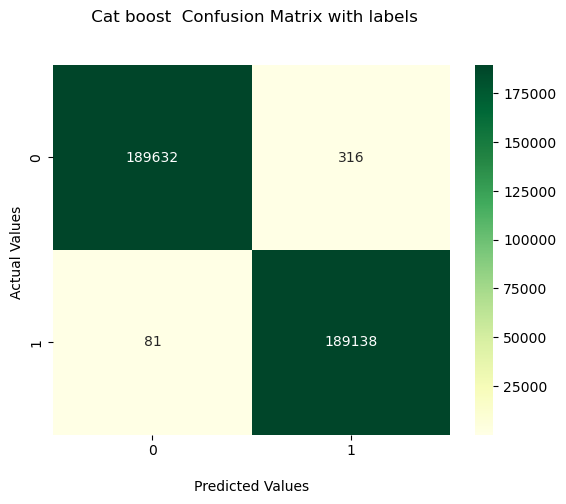

In [41]:


conf = confusion_matrix(y_test , y_test_cat)
print('confusion matrix \n',  conf)
ax = sns.heatmap(conf, annot=True,fmt='d', cmap='YlGn')

ax.set_title(' Cat boost  Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()



In [42]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    189948
         1.0       1.00      1.00      1.00    189219

    accuracy                           1.00    379167
   macro avg       1.00      1.00      1.00    379167
weighted avg       1.00      1.00      1.00    379167



In [43]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

# Gradient Boosting Classifier

In [44]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=15,learning_rate=0.1)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=15)

In [45]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [46]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.9539850953977184
Gradient Boosting Classifier : Accuracy on test Data: 0.9534637771747014

Gradient Boosting Classifier : f1_score on training Data: 0.9560313094844084
Gradient Boosting Classifier : f1_score on test Data: 0.9554415816281436

Gradient Boosting Classifier : Recall on training Data: 0.999882273354243
Gradient Boosting Classifier : Recall on test Data: 0.9997727500938066

Gradient Boosting Classifier : precision on training Data: 0.9158650170684169
Gradient Boosting Classifier : precision on test Data: 0.9148748899786244


confusion matrix 
 [[172346  17602]
 [    43 189176]]


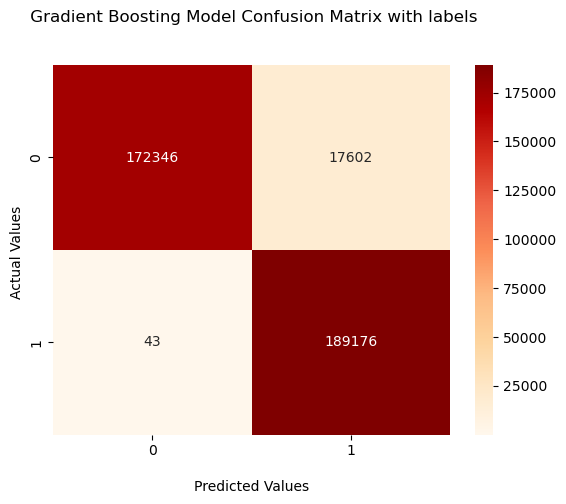

In [47]:


conf = confusion_matrix(y_test , y_test_gbc)
print('confusion matrix \n',  conf)
ax = sns.heatmap(conf, annot=True,fmt='d', cmap='OrRd')

ax.set_title(' Gradient Boosting Model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()



In [48]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95    189948
         1.0       0.91      1.00      0.96    189219

    accuracy                           0.95    379167
   macro avg       0.96      0.95      0.95    379167
weighted avg       0.96      0.95      0.95    379167



In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

# Knn Model

In [50]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=6)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [51]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

C:\Users\moode\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\moode\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [52]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.999048792045018
K-Nearest Neighbors : Accuracy on test Data: 0.99896351739471

K-Nearest Neighbors : f1_score on training Data: 0.9990498787322115
K-Nearest Neighbors : f1_score on test Data: 0.9989620939819939

K-Nearest Neighborsn : Recall on training Data: 0.9995519359004771
Logistic Regression : Recall on test Data: 0.999513790898377

K-Nearest Neighbors : precision on training Data: 0.9985483256595288
K-Nearest Neighbors : precision on test Data: 0.9984110057647233


confusion matrix 
 [[189647    301]
 [    92 189127]]


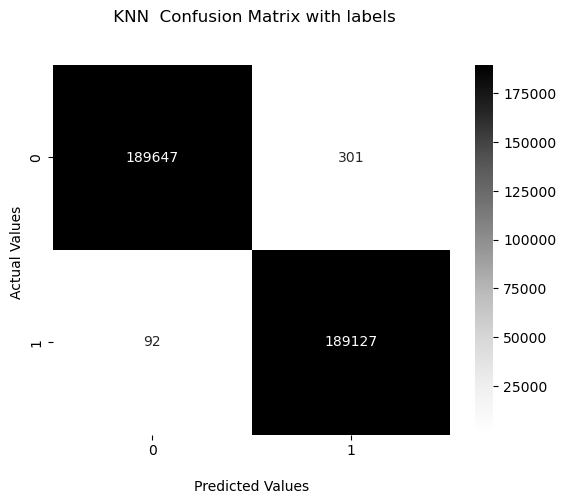

In [53]:
conf = confusion_matrix(y_test , y_test_knn)
print('confusion matrix \n',  conf)
ax = sns.heatmap(conf, annot=True,fmt='d', cmap='Greys')

ax.set_title(' KNN  Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()


In [54]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    189948
         1.0       1.00      1.00      1.00    189219

    accuracy                           1.00    379167
   macro avg       1.00      1.00      1.00    379167
weighted avg       1.00      1.00      1.00    379167



In [55]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

# Comparision of Models

In [56]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [57]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.914,0.921,0.996,0.857
1,Naive Bayes Classifier,0.786,0.821,0.985,0.705
2,Decision Tree,0.953,0.955,1.000,0.916
3,Random Forest,0.954,0.956,1.000,0.916
4,CatBoost Classifier,0.999,0.999,1.000,0.998
5,Gradient Boosting Classifier,0.953,0.955,1.000,0.916
6,K-Nearest Neighbors,0.999,0.999,1.000,0.999


In [58]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [59]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,CatBoost Classifier,0.999,0.999,1.000,0.998
1,K-Nearest Neighbors,0.999,0.999,1.000,0.999
2,Random Forest,0.954,0.956,1.000,0.916
3,Decision Tree,0.953,0.955,1.000,0.916
4,Gradient Boosting Classifier,0.953,0.955,1.000,0.916
5,Logistic Regression,0.914,0.921,0.996,0.857
6,Naive Bayes Classifier,0.786,0.821,0.985,0.705
